# Exploratory & Regression Analysis

In [ ]:
#import relevant libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Load and prepare data

In [3]:
df = pd.read_csv('farmer_climatechange_data.csv')
df.head()

,id,date,total_agr_land,workforce,trees,arable_land,ley,perm_grass,perm_crops,prot_cult,...,network,GHG_goal,env_goal,biodiv_goal,acknow_goal,yield_goal,income_goal,info_gew,info_resul,interviewtime
0,1,13.03.2019 10:59,4925.0,1.95406,79,3871,107,793,140,0,...,2,1,5,6,4,3,2,2,2,999.53
1,2,13.03.2019 11:08,2176.0,6.61310,12,1671,0,98,338,119,...,1,3,4,2,1,6,5,2,2,901.99
2,3,13.03.2019 11:37,2251.0,1.39384,31,1507,279,380,81,0,...,3,1,4,2,3,6,5,1,1,1832.99
3,4,13.03.2019 13:54,2389.0,1.99523,3,1969,71,322,0,0,...,1,2,5,4,1,3,6,2,1,2001.28
4,5,13.03.2019 14:18,3205.0,3.09942,39,1911,675,461,117,0,...,3,1,6,3,2,5,4,2,2,1809.30


In [4]:
#group data by relevant question
df_climate_feelings = df[['cons_general','cons_farm','self_reduc','self_act','self_cap','self_conf','self_not']]
df_weather = df.iloc[:,33:39]
df_cur_behav = df.iloc[:,45:71].fillna(0)
df_fut_behav = df.iloc[:,71:84].fillna(0)
df_fut_behav2 = df.iloc[:,84:91]
df_opinions = df.iloc[:,91:97]
df_opinions2 = df.iloc[:,97:102]
df_goals = df.iloc[:,218:224]
pd.concat([df_climate_feelings,df_weather],axis=1)

,cons_general,cons_farm,self_reduc,self_act,self_cap,self_conf,self_not,percep_hail,percep_drought,percep_frost,percep_heavyrain,percep_longrain,percep_heat
0,4,4,1,4,1,1,4,2,2,2,1,2,2
1,5,5,3,3,2,2,2,3,2,2,3,3,3
2,4,4,2,1,2,3,1,2,3,1,1,1,3
3,4,4,3,3,4,4,2,2,2,2,2,2,2
4,5,4,1,2,2,2,2,2,3,2,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,5,4,3,2,4,3,3,2,2,2,1,1,3
101,5,5,3,3,4,4,4,1,2,3,2,2,3
102,4,3,2,2,2,2,4,1,2,2,2,2,2
103,4,3,5,5,4,5,5,2,3,2,3,2,2


# Create correlation matrices for all group pairings

In [5]:
pd.concat([df_cur_behav,df_opinions],axis=1).corr()

,legum,legum_eff,conc,conc_eff,add,add_eff,lact,lact_eff,breed,breed_eff,...,biog,biog_eff,ecodr,ecodr_eff,attain_ghg,attain_yield,attain_biodiv,attain_soil,attain_incom,attain_acknow
legum,1.000000,-0.293535,0.783838,-0.374839,0.593262,-0.299854,0.411960,-0.221566,0.535656,-0.062264,...,NaN,-0.072308,0.000793,-0.007230,0.000356,-0.002086,-0.069085,-0.077262,0.033706,-0.018784
legum_eff,-0.293535,1.000000,-0.210704,0.638498,-0.190135,0.420104,-0.121707,0.484503,-0.222938,0.366994,...,NaN,0.392735,-0.132957,0.309538,-0.007247,-0.076327,-0.094714,-0.148748,-0.011918,-0.082455
conc,0.783838,-0.210704,1.000000,-0.405588,0.699906,-0.374929,0.542901,-0.266255,0.568544,0.011519,...,NaN,-0.010157,-0.049032,-0.001749,0.086950,0.113706,-0.185199,-0.060546,-0.002049,0.107120
conc_eff,-0.374839,0.638498,-0.405588,1.000000,-0.255087,0.464561,-0.179282,0.584556,-0.163055,0.249261,...,NaN,0.220328,-0.242594,0.221320,-0.134328,-0.140138,-0.091548,-0.174984,-0.040232,-0.095799
add,0.593262,-0.190135,0.699906,-0.255087,1.000000,-0.469239,0.767137,-0.271164,0.726550,0.018569,...,NaN,-0.076454,0.099375,-0.206607,0.056188,-0.019226,-0.053207,-0.092801,-0.048631,0.000394
add_eff,-0.299854,0.420104,-0.374929,0.464561,-0.469239,1.000000,-0.354391,0.592676,-0.336905,0.342177,...,NaN,0.437892,-0.161240,0.358024,-0.113491,-0.082219,-0.061155,-0.069527,-0.000385,0.053124
lact,0.411960,-0.121707,0.542901,-0.179282,0.767137,-0.354391,1.000000,-0.274395,0.545561,0.041281,...,NaN,-0.017534,0.077432,-0.157761,0.038726,0.015672,-0.044681,-0.107020,-0.140856,-0.029138
lact_eff,-0.221566,0.484503,-0.266255,0.584556,-0.271164,0.592676,-0.274395,1.000000,-0.101119,0.417956,...,NaN,0.391236,-0.170570,0.346507,0.015030,-0.221582,0.068404,-0.125332,-0.133478,-0.170977
breed,0.535656,-0.222938,0.568544,-0.163055,0.726550,-0.336905,0.545561,-0.101119,1.000000,-0.028070,...,NaN,-0.117111,-0.012150,-0.112957,0.074217,0.013321,0.002322,-0.124109,-0.110442,-0.036536
breed_eff,-0.062264,0.366994,0.011519,0.249261,0.018569,0.342177,0.041281,0.417956,-0.028070,1.000000,...,NaN,0.350982,-0.033481,0.344535,-0.008783,-0.124801,-0.065589,-0.197776,-0.170216,-0.145757


In [6]:
pd.concat([df_fut_behav,df_opinions],axis=1).corr()

,legum_imag,conc_imag,add_imag,lact_imag,breed_imag,covman_imag,comp_imag,drag_imag,cov_imag,plough_imag,solar_imag,biog_imag,ecodr_imag,attain_ghg,attain_yield,attain_biodiv,attain_soil,attain_incom,attain_acknow
legum_imag,1.000000,0.363219,0.319395,0.405758,0.224912,0.109098,0.177072,0.209866,-0.051428,0.048643,0.039672,0.277413,0.060249,-0.021654,0.201503,0.063536,0.210341,0.264926,-0.050931
conc_imag,0.363219,1.000000,0.264008,0.263181,0.296972,0.412514,0.327327,0.015456,0.143851,0.171903,0.045835,0.218218,0.033246,0.154328,0.211642,-0.039970,0.245491,0.218098,0.170392
add_imag,0.319395,0.264008,1.000000,0.298456,0.190500,0.297753,0.195529,0.228511,0.035726,-0.013330,0.010267,0.232191,-0.025135,-0.031600,0.018964,-0.058887,0.236819,0.206525,0.068898
lact_imag,0.405758,0.263181,0.298456,1.000000,0.087039,0.204063,0.016751,0.156608,0.175714,0.097443,0.089131,0.256843,0.049764,-0.079963,0.058485,0.133110,0.034649,0.109580,0.070496
breed_imag,0.224912,0.296972,0.190500,0.087039,1.000000,0.121268,0.115470,0.224912,-0.016548,0.034986,-0.121268,0.240563,0.087960,-0.031900,-0.044796,-0.105750,-0.041904,0.041966,-0.007641
covman_imag,0.109098,0.412514,0.297753,0.204063,0.121268,1.000000,0.256718,0.109098,0.192642,0.216374,0.062092,0.178925,0.128000,0.160925,0.199185,-0.045378,0.157529,0.120867,0.081541
comp_imag,0.177072,0.327327,0.195529,0.016751,0.115470,0.256718,1.000000,0.259706,-0.009554,0.232288,-0.015559,0.231481,0.038088,0.047885,0.142247,0.056359,0.163304,0.224119,-0.022057
drag_imag,0.209866,0.015456,0.228511,0.156608,0.224912,0.109098,0.259706,1.000000,-0.122479,-0.026467,-0.076038,-0.066894,0.060249,-0.049048,-0.054955,0.028608,0.075397,0.129781,0.014686
cov_imag,-0.051428,0.143851,0.035726,0.175714,-0.016548,0.192642,-0.009554,-0.122479,1.000000,0.061945,0.061538,0.054138,0.053127,-0.108106,-0.059301,-0.060843,-0.109558,-0.147568,-0.020736
plough_imag,0.048643,0.171903,-0.013330,0.097443,0.034986,0.216374,0.232288,-0.026467,0.061945,1.000000,0.186675,0.038715,0.081549,0.027008,-0.066607,-0.104447,-0.068537,0.061481,0.083137


In [7]:
pd.concat([df_fut_behav2,df_opinions],axis=1).corr()

,activ_dairy,activ_cattle,activ_pig,activ_poultry,activ_arab,activ_special,activ_nonag,attain_ghg,attain_yield,attain_biodiv,attain_soil,attain_incom,attain_acknow
activ_dairy,1.000000,0.273567,0.256074,0.270555,0.262193,-0.000452,0.079878,0.041133,0.027053,-0.024597,-0.036912,-0.074721,0.118003
activ_cattle,0.273567,1.000000,0.435113,0.440974,0.296298,-0.075562,-0.145521,0.103620,-0.102434,0.040420,-0.007510,-0.051223,0.006989
activ_pig,0.256074,0.435113,1.000000,0.626612,0.196997,0.038532,-0.104758,0.050025,-0.120937,0.023298,-0.104644,0.044949,0.173368
activ_poultry,0.270555,0.440974,0.626612,1.000000,0.203019,-0.046155,-0.075506,0.050930,-0.042840,-0.165907,-0.028579,0.034325,0.067535
activ_arab,0.262193,0.296298,0.196997,0.203019,1.000000,-0.139329,0.169055,-0.049476,-0.041200,0.019632,-0.051026,-0.020456,0.159440
activ_special,-0.000452,-0.075562,0.038532,-0.046155,-0.139329,1.000000,0.123639,0.054695,0.006077,-0.033545,0.002274,-0.157970,0.092454
activ_nonag,0.079878,-0.145521,-0.104758,-0.075506,0.169055,0.123639,1.000000,-0.125993,0.141771,-0.007723,0.015914,0.205198,0.139289
attain_ghg,0.041133,0.103620,0.050025,0.050930,-0.049476,0.054695,-0.125993,1.000000,0.087168,0.335471,0.167356,0.015730,-0.156093
attain_yield,0.027053,-0.102434,-0.120937,-0.042840,-0.041200,0.006077,0.141771,0.087168,1.000000,-0.020042,0.143131,0.363058,0.246445
attain_biodiv,-0.024597,0.040420,0.023298,-0.165907,0.019632,-0.033545,-0.007723,0.335471,-0.020042,1.000000,0.093910,0.120763,-0.191815


In [8]:
pd.concat([df_cur_behav,df_opinions2],axis=1).corr()

,legum,legum_eff,conc,conc_eff,add,add_eff,lact,lact_eff,breed,breed_eff,...,solar_eff,biog,biog_eff,ecodr,ecodr_eff,innov_pion,innov_early,innov_thorou,innov_others,innov_trad
legum,1.000000,-0.293535,0.783838,-0.374839,0.593262,-0.299854,0.411960,-0.221566,0.535656,-0.062264,...,-0.047837,NaN,-0.072308,0.000793,-0.007230,-0.190045,-0.036057,0.063835,0.044610,0.005773
legum_eff,-0.293535,1.000000,-0.210704,0.638498,-0.190135,0.420104,-0.121707,0.484503,-0.222938,0.366994,...,0.235110,NaN,0.392735,-0.132957,0.309538,0.339382,0.158045,0.022902,0.076231,0.248537
conc,0.783838,-0.210704,1.000000,-0.405588,0.699906,-0.374929,0.542901,-0.266255,0.568544,0.011519,...,0.058274,NaN,-0.010157,-0.049032,-0.001749,-0.122394,-0.007167,0.074797,0.048785,0.066574
conc_eff,-0.374839,0.638498,-0.405588,1.000000,-0.255087,0.464561,-0.179282,0.584556,-0.163055,0.249261,...,0.219132,NaN,0.220328,-0.242594,0.221320,0.229654,0.147313,-0.029299,0.041509,0.175609
add,0.593262,-0.190135,0.699906,-0.255087,1.000000,-0.469239,0.767137,-0.271164,0.726550,0.018569,...,-0.100254,NaN,-0.076454,0.099375,-0.206607,-0.086407,-0.005794,0.043266,-0.052819,0.022537
add_eff,-0.299854,0.420104,-0.374929,0.464561,-0.469239,1.000000,-0.354391,0.592676,-0.336905,0.342177,...,0.354343,NaN,0.437892,-0.161240,0.358024,0.244066,0.206771,0.065870,0.046843,0.146979
lact,0.411960,-0.121707,0.542901,-0.179282,0.767137,-0.354391,1.000000,-0.274395,0.545561,0.041281,...,-0.091062,NaN,-0.017534,0.077432,-0.157761,0.027237,0.019367,-0.109333,0.008669,0.050394
lact_eff,-0.221566,0.484503,-0.266255,0.584556,-0.271164,0.592676,-0.274395,1.000000,-0.101119,0.417956,...,0.291456,NaN,0.391236,-0.170570,0.346507,0.236179,0.210015,0.031271,0.089502,0.229143
breed,0.535656,-0.222938,0.568544,-0.163055,0.726550,-0.336905,0.545561,-0.101119,1.000000,-0.028070,...,0.017005,NaN,-0.117111,-0.012150,-0.112957,-0.129576,-0.024085,0.045566,0.038315,0.002603
breed_eff,-0.062264,0.366994,0.011519,0.249261,0.018569,0.342177,0.041281,0.417956,-0.028070,1.000000,...,0.225556,NaN,0.350982,-0.033481,0.344535,0.140109,0.050066,0.039650,-0.063619,0.084861


# Select correlations for further analysis

<AxesSubplot:>

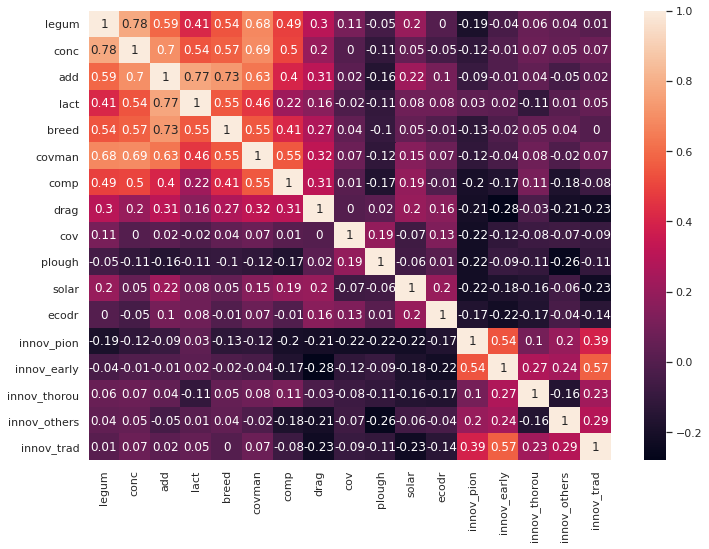

In [9]:
#correlations between current farming behaviors and climate change opinions (variables starting with "innov")
df_cur_behav1 = df_cur_behav[['legum','conc','add','lact','breed','covman','comp','drag','cov','plough','solar','ecodr']]
corr = pd.concat([df_cur_behav1,df_opinions2],axis=1).corr().round(2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr, annot=True)

<AxesSubplot:>

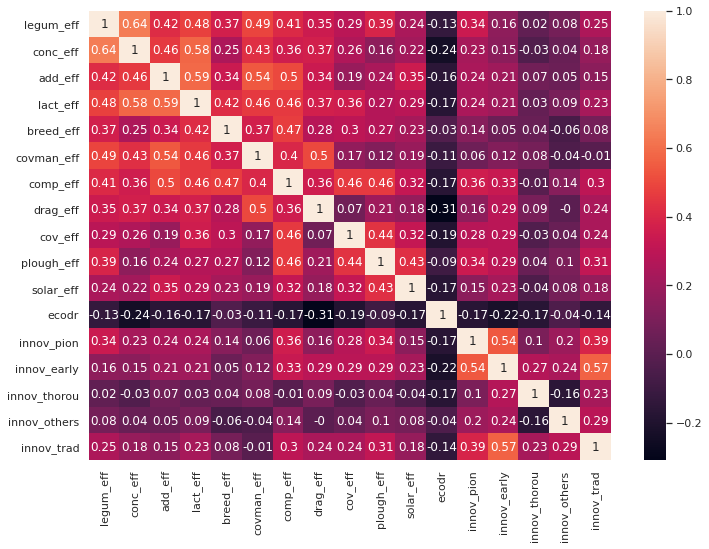

In [71]:
#correlations between farming behavior effectiveness and climate change opinions
df_cur_behav1 = df_cur_behav[['legum_eff','conc_eff','add_eff','lact_eff','breed_eff','covman_eff','comp_eff','drag_eff','cov_eff','plough_eff','solar_eff','ecodr']]
corr = pd.concat([df_cur_behav1,df_opinions2],axis=1).corr().round(2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr, annot=True)

# Regression analysis and modeling

In [11]:
#random forest regression model using effectiveness of farming behaviors to predict climate change behavior variables
x = df[['legum_eff','conc_eff','add_eff','lact_eff','comp_eff','cov_eff']].fillna(0)
#y = df['innov_pion']
y = df['innov_early']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
y_pred = rf.predict(X_test)

#metrics to evaluate model accuracy
r2_train = rf.score(X_train,y_train)
r2_test = rf.score(X_test,y_test)

MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#MAE, MSE, RMSE
r2_train,r2_test

(0.802033396394227, 0.3638813812502827)

,Compost farm manure,innov_early
0,Yes,4.058824
1,No,3.089552
2,Not relevant,3.333333


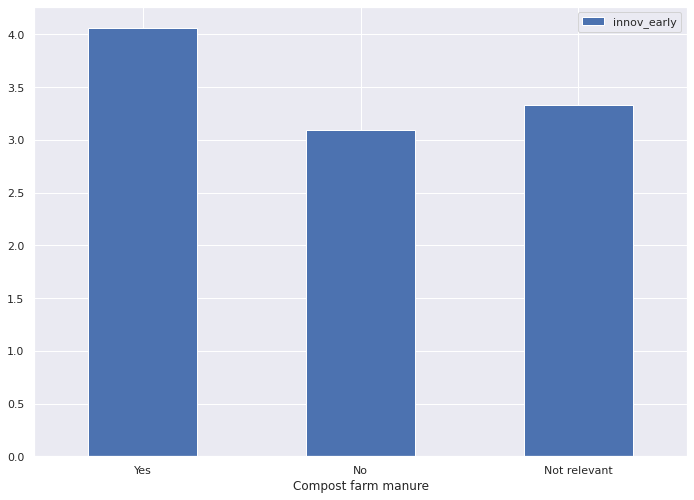

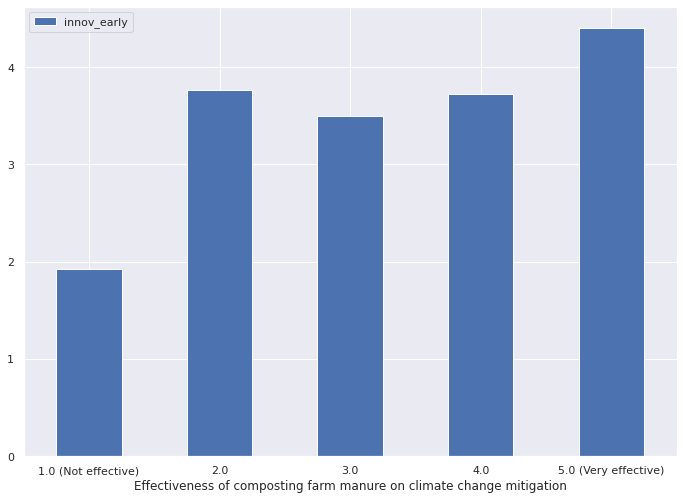

In [12]:
#analysis of specific farm behavior question with high correlation to climate change mitigation opinion
comp_eff=df[['comp_eff','innov_early']].groupby('comp_eff').mean().reset_index()
comp=df[['comp','innov_early']].groupby('comp').mean().reset_index()
comp['comp'] = comp['comp'].replace({1: "Yes"})
comp['comp'] = comp['comp'].replace({2: "No"})
comp['comp'] = comp['comp'].replace({3: "Not relevant"})
comp = comp.rename(columns={'comp': 'Compost farm manure'})
comp_eff['comp_eff'] = comp_eff['comp_eff'].replace({1.0: "1.0 (Not effective)"})
comp_eff['comp_eff'] = comp_eff['comp_eff'].replace({5.0: "5.0 (Very effective)"})
comp_eff = comp_eff.rename(columns={'comp_eff': 'Effectiveness of composting farm manure on climate change mitigation'})

comp.plot.bar(x='Compost farm manure', y='innov_early', rot=0) 
comp_eff.plot.bar(x='Effectiveness of composting farm manure on climate change mitigation', y='innov_early', rot=0)
comp

In [13]:
#regression model using farming behaviors to predict climate change opinions
x = df[['comp','drag','plough','cov','solar']]
y = df['innov_pion']
#y = df['innov_early']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_train = rf.score(X_train,y_train)
r2_test = rf.score(X_test,y_test)

MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#MAE, MSE, RMSE
r2_train,r2_test

(0.47718563526853475, -0.16479053517916387)

,innov_pion,Predicted,Residuals
30,3,4.664333,-1.664333
65,2,2.829407,-0.829407
64,4,3.261389,0.738611
53,2,2.912476,-0.912476
45,1,2.920018,-1.920018
94,5,1.756166,3.243834
104,3,2.720595,0.279405
47,3,2.110036,0.889964
10,1,2.654842,-1.654842
0,1,2.829407,-1.829407


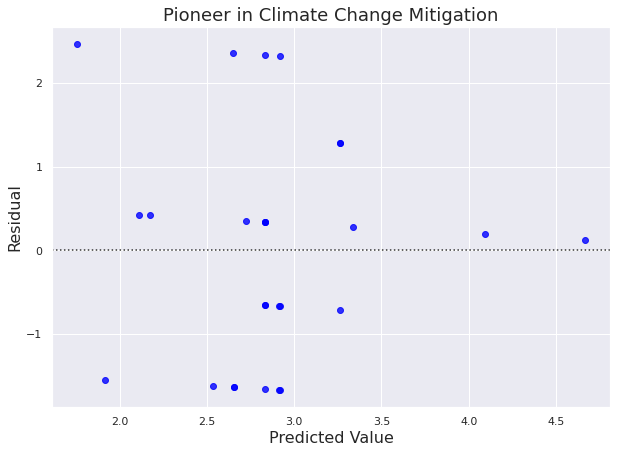

In [24]:
#residual calculation of above model
df_results = pd.DataFrame()
df_results['innov_pion'] = y_test
df_results['Predicted'] = y_pred

df_results['Residuals'] = abs(df_results['innov_pion']) - abs(df_results['Predicted'])

# Residual plot using df_result
fig = plt.figure(figsize=(10,7))
sns.residplot(x = "Predicted", y = "innov_pion",data = df_results, color='blue')

plt.title('Pioneer in Climate Change Mitigation', size=18)
plt.xlabel('Predicted Value', size=16)
plt.ylabel('Residual', size=16)
df_results

In [94]:
#regression model predicting farming behaviors based on other farming behaviors
x = df[['legum','add']]#,'conc','add','lact']]
y = df['conc']

X_train, X_test, y_train, y_test = train_test_split(x, y)

rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_train = rf.score(X_train,y_train)
r2_test = rf.score(X_test,y_test)

MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#MAE, MSE, RMSE
r2_train,r2_test

(0.7546203780310609, 0.7237414250126508)

In [92]:
#second regression model predicting farming behaviors based on other farming behaviors
x = df[['add','conc','lact']]
y = df['legum']

X_train, X_test, y_train, y_test = train_test_split(x, y)

rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_train = rf.score(X_train,y_train)
r2_test = rf.score(X_test,y_test)

MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#MAE, MSE, RMSE
r2_train,r2_test

(0.7227994702606642, 0.6640845981847909)

In [79]:
#regression model predicting opinion about method effectiveness based on if the farmer implements the method or not
x = df[['legum']]
y = df['legum_eff'].fillna(0)

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

linreg = LinearRegression().fit(X_train, y_train)
y_pred = linreg.predict(X_test)
r2_train = linreg.score(X_train,y_train)
r2_test = linreg.score(X_test,y_test)
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#MAE, MSE, RMSE
r2_train, r2_test

(0.08008397370480569, 0.10583079618455116)

In [33]:
#additional correlation analyses
pd.concat([df_fut_behav,df_opinions2],axis=1).corr()

,legum_imag,conc_imag,add_imag,lact_imag,breed_imag,covman_imag,comp_imag,drag_imag,cov_imag,plough_imag,solar_imag,biog_imag,ecodr_imag,innov_pion,innov_early,innov_thorou,innov_others,innov_trad
legum_imag,1.000000,0.363219,0.319395,0.405758,0.224912,0.109098,0.177072,0.209866,-0.051428,0.048643,0.039672,0.277413,0.060249,-0.099621,-0.021306,-0.049469,-0.030398,-0.020131
conc_imag,0.363219,1.000000,0.264008,0.263181,0.296972,0.412514,0.327327,0.015456,0.143851,0.171903,0.045835,0.218218,0.033246,0.134641,0.064895,-0.038102,0.179505,0.179178
add_imag,0.319395,0.264008,1.000000,0.298456,0.190500,0.297753,0.195529,0.228511,0.035726,-0.013330,0.010267,0.232191,-0.025135,-0.008756,0.012031,0.136564,-0.069057,-0.025472
lact_imag,0.405758,0.263181,0.298456,1.000000,0.087039,0.204063,0.016751,0.156608,0.175714,0.097443,0.089131,0.256843,0.049764,-0.041007,-0.099972,-0.233983,0.141384,-0.035972
breed_imag,0.224912,0.296972,0.190500,0.087039,1.000000,0.121268,0.115470,0.224912,-0.016548,0.034986,-0.121268,0.240563,0.087960,0.045965,-0.005921,0.141134,0.061947,0.054699
covman_imag,0.109098,0.412514,0.297753,0.204063,0.121268,1.000000,0.256718,0.109098,0.192642,0.216374,0.062092,0.178925,0.128000,0.044592,-0.094773,0.008150,0.156921,0.078125
comp_imag,0.177072,0.327327,0.195529,0.016751,0.115470,0.256718,1.000000,0.259706,-0.009554,0.232288,-0.015559,0.231481,0.038088,0.106151,0.037601,0.155207,-0.099347,0.038599
drag_imag,0.209866,0.015456,0.228511,0.156608,0.224912,0.109098,0.259706,1.000000,-0.122479,-0.026467,-0.076038,-0.066894,0.060249,-0.173632,-0.199257,0.008245,-0.178168,-0.254998
cov_imag,-0.051428,0.143851,0.035726,0.175714,-0.016548,0.192642,-0.009554,-0.122479,1.000000,0.061945,0.061538,0.054138,0.053127,0.014071,0.010385,0.040036,-0.023235,0.143013
plough_imag,0.048643,0.171903,-0.013330,0.097443,0.034986,0.216374,0.232288,-0.026467,0.061945,1.000000,0.186675,0.038715,0.081549,0.016684,-0.056755,-0.232774,-0.041900,0.095047


In [34]:
pd.concat([df_fut_behav2,df_opinions2],axis=1).corr()

,activ_dairy,activ_cattle,activ_pig,activ_poultry,activ_arab,activ_special,activ_nonag,innov_pion,innov_early,innov_thorou,innov_others,innov_trad
activ_dairy,1.000000,0.273567,0.256074,0.270555,0.262193,-0.000452,0.079878,-0.099932,-0.075012,-0.151991,-0.011524,-0.024908
activ_cattle,0.273567,1.000000,0.435113,0.440974,0.296298,-0.075562,-0.145521,-0.087921,-0.056788,-0.063133,0.145821,0.074222
activ_pig,0.256074,0.435113,1.000000,0.626612,0.196997,0.038532,-0.104758,-0.100893,-0.054345,0.123063,-0.158514,0.026110
activ_poultry,0.270555,0.440974,0.626612,1.000000,0.203019,-0.046155,-0.075506,-0.072935,-0.101440,0.082200,-0.045523,-0.038178
activ_arab,0.262193,0.296298,0.196997,0.203019,1.000000,-0.139329,0.169055,-0.175101,-0.063339,-0.172081,0.047402,-0.137642
activ_special,-0.000452,-0.075562,0.038532,-0.046155,-0.139329,1.000000,0.123639,0.060480,0.033088,-0.045582,-0.017553,-0.049136
activ_nonag,0.079878,-0.145521,-0.104758,-0.075506,0.169055,0.123639,1.000000,-0.187656,-0.138283,-0.131446,-0.104560,-0.093481
innov_pion,-0.099932,-0.087921,-0.100893,-0.072935,-0.175101,0.060480,-0.187656,1.000000,0.538971,0.098466,0.196706,0.385099
innov_early,-0.075012,-0.056788,-0.054345,-0.101440,-0.063339,0.033088,-0.138283,0.538971,1.000000,0.268583,0.240351,0.569116
innov_thorou,-0.151991,-0.063133,0.123063,0.082200,-0.172081,-0.045582,-0.131446,0.098466,0.268583,1.000000,-0.156815,0.232823


In [37]:
pd.concat([df_cur_behav,df_climate_feelings],axis=1).corr()

,legum,legum_eff,conc,conc_eff,add,add_eff,lact,lact_eff,breed,breed_eff,...,biog_eff,ecodr,ecodr_eff,cons_general,cons_farm,self_reduc,self_act,self_cap,self_conf,self_not
legum,1.000000,-0.293535,0.783838,-0.374839,0.593262,-0.299854,0.411960,-0.221566,0.535656,-0.062264,...,-0.072308,0.000793,-0.007230,-0.080311,-0.018430,-0.209160,-0.167286,-0.105132,-0.132149,-0.065870
legum_eff,-0.293535,1.000000,-0.210704,0.638498,-0.190135,0.420104,-0.121707,0.484503,-0.222938,0.366994,...,0.392735,-0.132957,0.309538,0.025084,0.080292,0.351686,0.385735,0.181871,0.253334,0.182615
conc,0.783838,-0.210704,1.000000,-0.405588,0.699906,-0.374929,0.542901,-0.266255,0.568544,0.011519,...,-0.010157,-0.049032,-0.001749,-0.081061,-0.083729,-0.186158,-0.108231,-0.058208,-0.088123,0.015199
conc_eff,-0.374839,0.638498,-0.405588,1.000000,-0.255087,0.464561,-0.179282,0.584556,-0.163055,0.249261,...,0.220328,-0.242594,0.221320,0.102235,0.021304,0.357050,0.306066,0.164536,0.300587,0.185664
add,0.593262,-0.190135,0.699906,-0.255087,1.000000,-0.469239,0.767137,-0.271164,0.726550,0.018569,...,-0.076454,0.099375,-0.206607,-0.094708,-0.116089,-0.197170,-0.206298,-0.061882,-0.073451,-0.021498
add_eff,-0.299854,0.420104,-0.374929,0.464561,-0.469239,1.000000,-0.354391,0.592676,-0.336905,0.342177,...,0.437892,-0.161240,0.358024,0.096803,0.104134,0.317223,0.285758,0.250321,0.316868,0.205490
lact,0.411960,-0.121707,0.542901,-0.179282,0.767137,-0.354391,1.000000,-0.274395,0.545561,0.041281,...,-0.017534,0.077432,-0.157761,-0.081894,-0.069242,-0.104756,-0.133060,0.018936,-0.033982,-0.021017
lact_eff,-0.221566,0.484503,-0.266255,0.584556,-0.271164,0.592676,-0.274395,1.000000,-0.101119,0.417956,...,0.391236,-0.170570,0.346507,-0.078028,-0.071903,0.254020,0.371778,0.132237,0.274660,0.165568
breed,0.535656,-0.222938,0.568544,-0.163055,0.726550,-0.336905,0.545561,-0.101119,1.000000,-0.028070,...,-0.117111,-0.012150,-0.112957,-0.132958,-0.090242,-0.169905,-0.251219,-0.044898,-0.041467,-0.061191
breed_eff,-0.062264,0.366994,0.011519,0.249261,0.018569,0.342177,0.041281,0.417956,-0.028070,1.000000,...,0.350982,-0.033481,0.344535,0.091592,0.098849,0.221302,0.137539,0.010031,0.145426,0.153084


In [25]:
#regression model that uses behavior effectiveness variables to predict additional climate change variables
x = df[['legum_eff','conc_eff','add_eff','lact_eff','comp_eff','cov_eff','drag_eff','plough_eff','biog_eff','ecodr_eff']].fillna(0)
y = df['self_act']
#y = df['self_conf']
#y = df['self_reduc']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_train = rf.score(X_train,y_train)
r2_test = rf.score(X_test,y_test)

MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#MAE, MSE, RMSE
r2_train,r2_test

(0.8941610183189654, 0.342869400630915)

,innov_pion,Predicted,Residuals
30,3,3.05,-0.05
65,1,2.77,-1.77
64,3,2.77,0.23
53,4,3.60,0.40
45,5,2.43,2.57
94,1,2.79,-1.79
104,3,3.97,-0.97
47,2,2.61,-0.61
10,2,2.64,-0.64
0,4,2.70,1.30


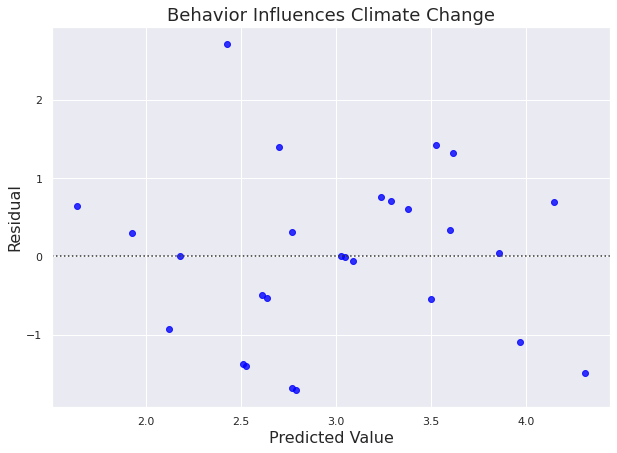

In [27]:
#residual calculations for above model
df_results = pd.DataFrame()
df_results['innov_pion'] = y_test
df_results['Predicted'] = y_pred

df_results['Residuals'] = abs(df_results['innov_pion']) - abs(df_results['Predicted'])

fig = plt.figure(figsize=(10,7))
sns.residplot(x = "Predicted", y = "innov_pion",data = df_results, color='blue')

plt.title('Behavior Influences Climate Change', size=18)
plt.xlabel('Predicted Value', size=16)
plt.ylabel('Residual', size=16)
df_results

In [128]:
#regression model that uses farming behaviors to predict additional climate change opinion attributes
x = df[['legum','conc','add','lact','comp','cov','biog']].fillna(0)
y = df['self_act']
#y = df['self_conf']
#y = df['self_reduc']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_train = rf.score(X_train,y_train)
r2_test = rf.score(X_test,y_test)

MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#MAE, MSE, RMSE
r2_train,r2_test

(0.5151979757023348, -0.2203851193882096)

In [58]:
#exploratory analysis of network attributes from survey data
df_net_import = df.iloc[:,203:213].fillna(0)
df_net_total = df.iloc[:,113:213].fillna(0)
df_network2 = df.iloc[:,113:203].fillna(0)
df_stack = df_network2.stack().reset_index()
df_stack[['net', 'number','person']] = df_stack['level_1'].str.split('_', 2, expand=True)
df_stack = df_stack[df_stack[0] > 0]
df_import_stack = df_net_import.stack().reset_index()
df_import_stack[['net', 'number','person']] = df_import_stack['level_1'].str.split('_', 2, expand=True)
df_import_stack = df_import_stack.rename({0: 'import_value'}, axis=1)
df_import_stack = df_import_stack[['level_0','number','import_value']]
df_join = pd.merge(df_stack, df_import_stack,  how='left', left_on=['level_0','number'], right_on = ['level_0','number'])
df_join

,level_0,level_1,0,net,number,person,import_value
0,0,net_name1_fam,1.0,net,name1,fam,2.0
1,0,net_name2_fam,1.0,net,name2,fam,1.0
2,0,net_name2_part,1.0,net,name2,part,1.0
3,1,net_name1_work,1.0,net,name1,work,2.0
4,2,net_name1_work,1.0,net,name1,work,2.0
...,...,...,...,...,...,...,...
665,104,net_name6_work,1.0,net,name6,work,2.0
666,104,net_name7_frien,1.0,net,name7,frien,3.0
667,104,net_name8_work,1.0,net,name8,work,2.0
668,104,net_name9_work,1.0,net,name9,work,2.0


Text(0, 0.5, 'Count')

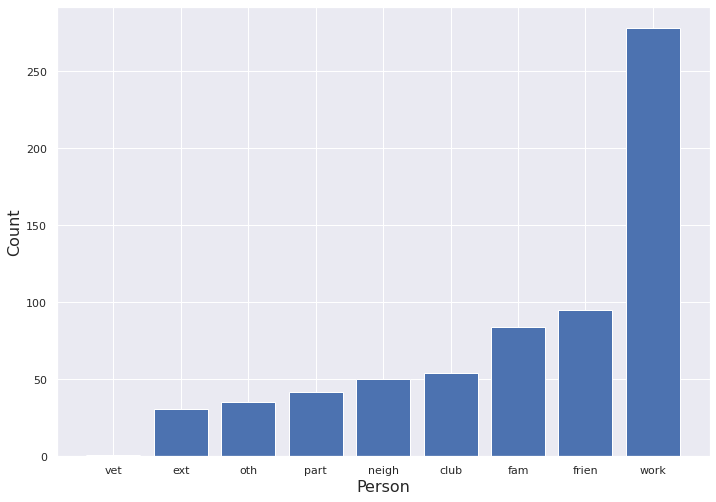

In [72]:
#plot of counts of people in farmers network that discuss agricultural topics
grouped = df_join.groupby(by=['person']).agg({'number':'count','import_value':'mean'}).reset_index()
grouped.sort_values('number',inplace=True)
plt.bar(grouped['person'],grouped['number'])
plt.xlabel('Person', size=16)
plt.ylabel('Count', size=16)

Text(0, 0.5, 'Average importance')

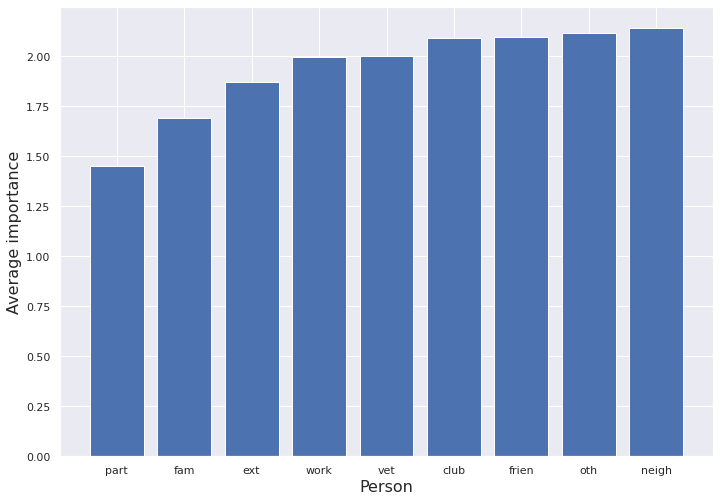

In [73]:
#plot of importance of people in farmers network in making farming decisions (1 = most important)
grouped.sort_values('import_value',inplace=True)
plt.bar(grouped['person'],grouped['import_value'])
plt.xlabel('Person', size=16)
plt.ylabel('Average importance', size=16)